In [1]:
ps2 = fits.open('../plane_ps2_08_01_19.fits')[1].data

In [2]:
#detcut = np.where((ps['ng'] > 0) & (ps['nr'] > 0) & (ps['ni'] > 0) & (ps['nz'] > 0) & (ps['ny'] > 0))
detcut = np.where((ps['ng'] > 0) & (ps['nr'] > 0) & (ps['ni'] > 0) & (ps['nz'] > 0) & (ps['ny'] > 0) & (ps['gMeanPSFMag'] > 0) & (ps['rMeanPSFMag'] > 0) & (ps['iMeanPSFMag'] > 0) & (ps['zMeanPSFMag'] > 0) & (ps['yMeanPSFMag'] > 0))

ps2 = ps[detcut]

In [3]:
print len(ps)
print len(ps2)

1677421
1677421


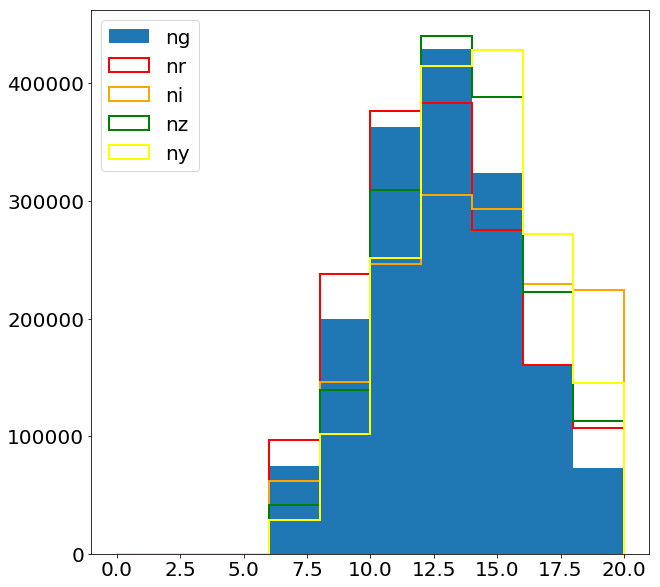

In [4]:
plt.hist(ps2['ng'], bins=10, range=[0,20], label='ng')
plt.hist(ps2['nr'], bins=10, range=[0,20], histtype='step', linewidth=2, stacked=True, color='red', label='nr')
plt.hist(ps2['ni'], bins=10, range=[0,20], histtype='step', linewidth=2, stacked=True, color='orange', label='ni')
plt.hist(ps2['nz'], bins=10, range=[0,20], histtype='step', linewidth=2, stacked=True, color='green', label='nz')
plt.hist(ps2['ny'], bins=10, range=[0,20], histtype='step', linewidth=2, stacked=True, color='yellow', label='ny')
plt.legend(loc=2)
plt.show()

In [5]:
pg = fits.open('../plane_gaiadr2_dust_06_12_19.fits')[1].data
#pggal = SkyCoord(pg['ra_plane']*u.deg, pg['dec_plane']*u.deg, frame='icrs')
#psgal = SkyCoord(ps2['ra']*u.deg, ps2['dec']*u.deg, frame='icrs')
#psind, pgind, angsep, ang3d = search_around_sky(psgal, pggal, 1*u.arcsec)

In [6]:
#ps3 = ps2[psind]
#pg2 = pg[pgind]
#psg = hstack([Table(ps3), Table(pg2)])

psg = fits.open('../plane_gaia_ps2_08_06_19.fits')[1].data
print len(psg)

1489024


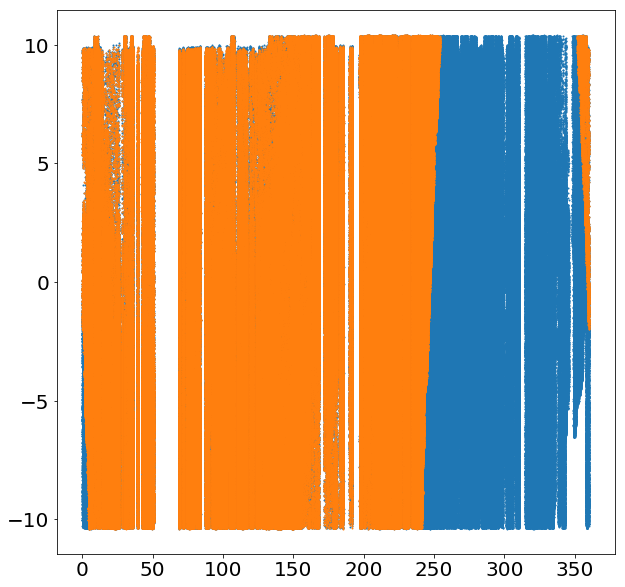

In [7]:
plt.scatter(pg['gl'], pg['gb'],s=1)
plt.scatter(ps['gl'], ps['gb'],s=1)
plt.show()

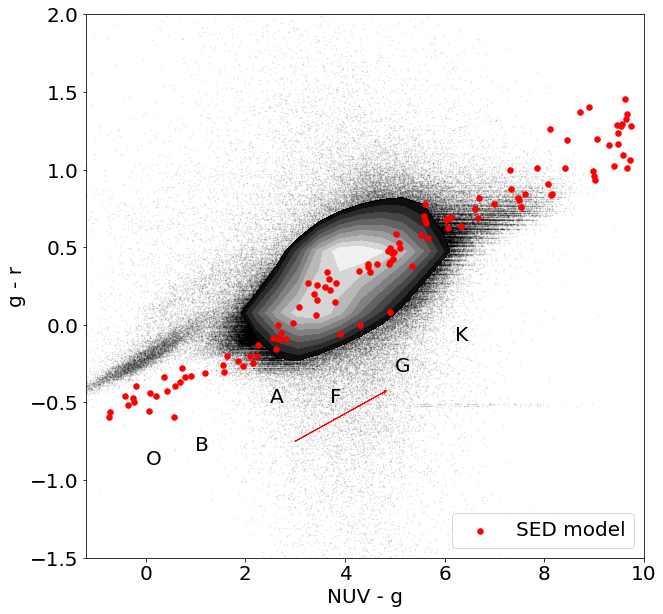

In [10]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
fig, ax = plt.subplots()
pickles = Table.read('../picklemags_laphare_final.txt', format='ascii')
scatter_contour(psg['nuv']-psg['gMeanPSFMag'], psg['gMeanPSFMag']-psg['rMeanPSFMag'], threshold=10000, log_counts=True, histogram2d_args=dict(bins=40), plot_args=dict(color='k', markersize=1, alpha=0.1), contour_args=dict(cmap=cm.gray))
plt.scatter(pickles['nuv']-pickles['g'], pickles['g']-pickles['r'], color='red', label='SED model',  s=30, zorder=20)
plt.xlim((-1.2, 10))
plt.ylim((-1.5, 2))

plt.annotate('O', xy=(0, -0.9), size=20)
plt.annotate('B', xy=(1, -0.81), size=20)
plt.annotate('A', xy=(2.5, -0.5), size=20)
plt.annotate('F', xy=(3.7, -0.5), size=20)
plt.annotate('G', xy=(5, -0.3), size=20)
plt.annotate('K', xy=(6.2, -0.1), size=20)
plt.xlabel('NUV - g')
plt.ylabel('g - r')
plt.arrow(3,  -0.75,  2.972-1.1838,  1.1838-0.8664,  head_length=0.05,  head_width=0.02,  color='red')
plt.legend(scatterpoints=1, loc=4)
plt.show()

# MS, WDs and binaries respectively
p1 = Polygon([[1.7, -0.5], [1.9, 0.3], [2.7, 0.7], [4, 1.05], [5.2, 1.05], [5.8, 1], [6.5, 0.95], [6.6, 0.3], [6, -0.1], [4.6, -0.4], [3.2, -0.5], [1.7, -0.5]])
p2 = Polygon([[-1, -0.6], [0.9, -0.25], [0.73, 0], [-1, -0.3], [-1, -0.6]])
p3 = Polygon([[1.7, -0.5], [1.9, 0.3], [2.7, 0.7], [4, 1.05], [5.2, 1.05], [5.8, 1], [6.5, 0.95], [6.5, 2], [-2.1, 2], [-2.1, 0.5], [1.9, 0.3]])

patches = [p1, p2, p3]
p = PatchCollection(patches, alpha=0.3, cmap=matplotlib.cm.jet)
p.set_array(np.array([100, 50, 80]))
#p.set_array(np.array(100.*np.random.rand(3)))
ax.add_collection(p)
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


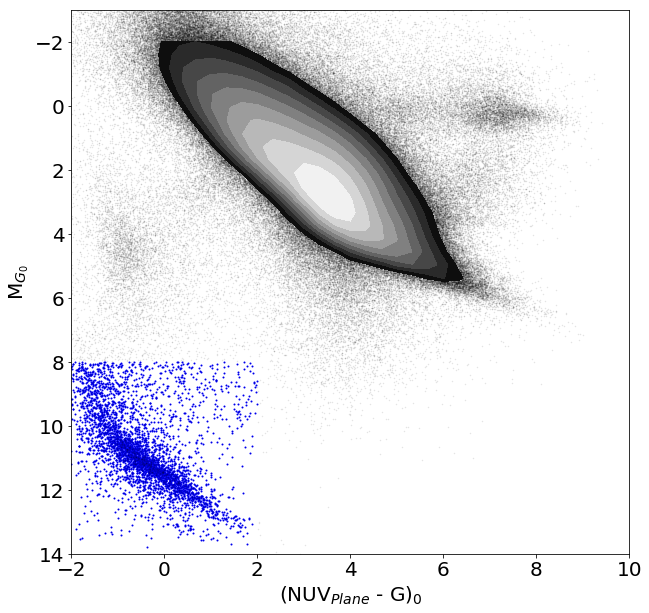

In [12]:
threshold = 1000
bins = 40
nuvg = (psg['nuv']-psg['ebv']*7.24)-(psg['phot_g_mean_mag']-psg['ebv']*2.85)
mg = psg['phot_g_mean_mag']-psg['distmod']-psg['ebv']*2.85

wdcut = np.where((nuvg < 2) & (mg > 8))
wds = psg[wdcut]

scatter_contour(nuvg, mg, threshold=threshold, log_counts=True, histogram2d_args=dict(bins=bins, range=[[-1,12], [-2,14]]), plot_args=dict(color='k', markersize=1, alpha=0.1), contour_args=dict(cmap=cm.gray, zorder=10))

plt.scatter(nuvg[wdcut], mg[wdcut], s=1,c='blue', label='WDs')
plt.xlabel('(NUV$_{Plane}$ - G)$_{0}$')
plt.ylabel('M$_{G_0}$')
plt.xlim((-2, 10))
plt.ylim((14, -3))
plt.show()

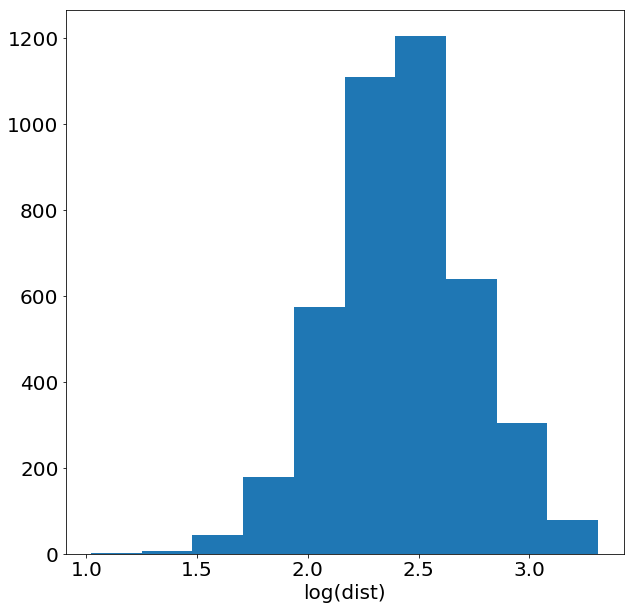

In [13]:
plt.hist(np.log10(wds['dist']))
plt.xlabel('log(dist)')
plt.show()

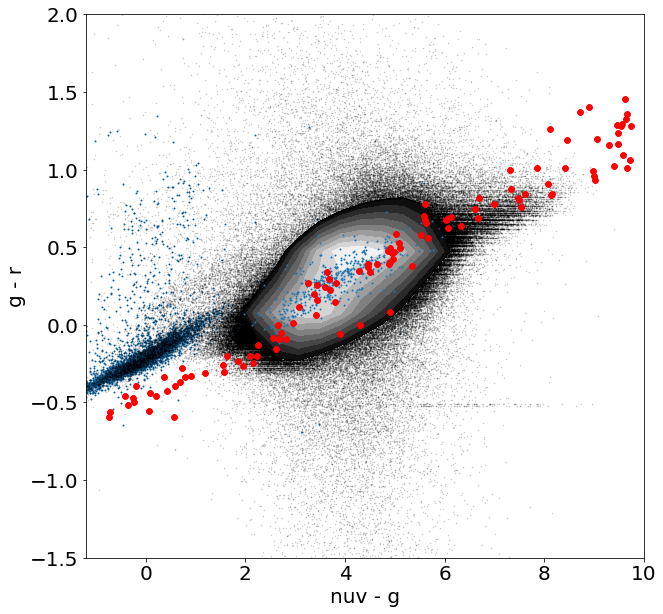

In [15]:
scatter_contour(psg['nuv']-psg['gMeanPSFMag'], psg['gMeanPSFMag']-psg['rMeanPSFMag'], threshold=10000, log_counts=True, histogram2d_args=dict(bins=40), plot_args=dict(color='k', markersize=1, alpha=0.1), contour_args=dict(cmap=cm.gray))
plt.scatter(pickles['nuv']-pickles['g'], pickles['g']-pickles['r'], color='red', label='SED model',  s=30, zorder=20)
plt.scatter(wds['nuv']-wds['gMeanPSFMag'], wds['gMeanPSFMag']-wds['rMeanPSFMag'],s=1)
plt.xlim((-1.2, 10))
plt.ylim((-1.5, 2))
plt.xlabel('nuv - g')
plt.ylabel('g - r')
plt.show()

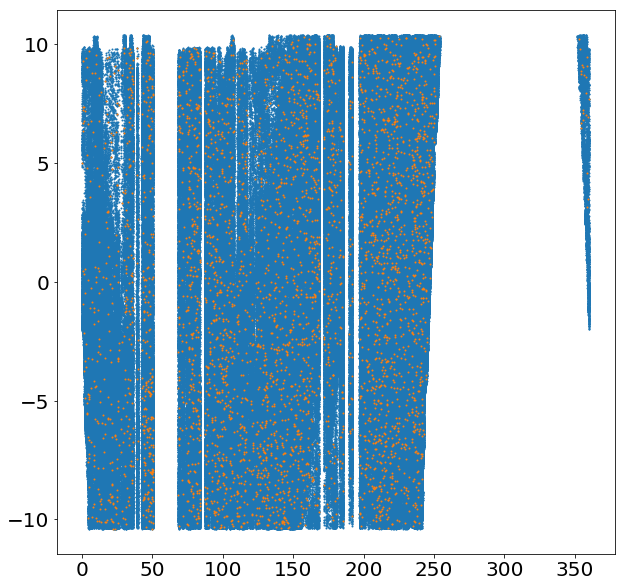

In [17]:
plt.scatter(psg['gl'], psg['gb'], s=1)
plt.scatter(wds['gl'], wds['gb'], s=1)
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


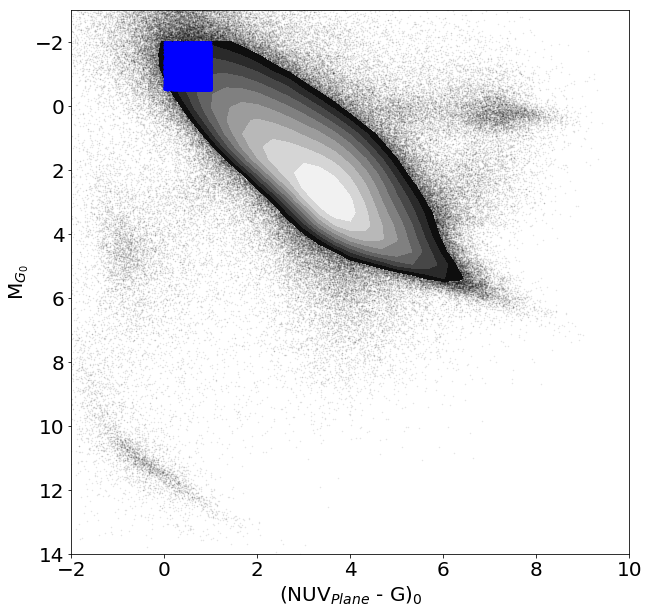

In [18]:
obcut = np.where((mg < -0.5) & (mg > -2) & (nuvg > 0) & (nuvg < 1))
ob = psg[obcut]

scatter_contour(nuvg, mg, threshold=threshold, log_counts=True, histogram2d_args=dict(bins=bins, range=[[-1,12], [-2,14]]), plot_args=dict(color='k', markersize=1, alpha=0.1), contour_args=dict(cmap=cm.gray, zorder=10))

plt.scatter(nuvg[obcut], mg[obcut], s=1,c='blue', label='WDs', zorder=10)
plt.xlabel('(NUV$_{Plane}$ - G)$_{0}$')
plt.ylabel('M$_{G_0}$')
plt.xlim((-2, 10))
plt.ylim((14, -3))
plt.show()

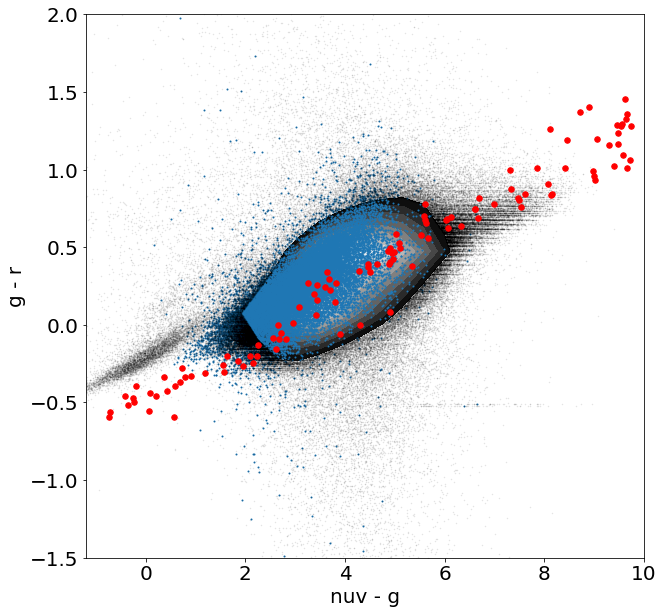

In [31]:
scatter_contour(psg['nuv']-psg['gMeanPSFMag'], psg['gMeanPSFMag']-psg['rMeanPSFMag'], threshold=10000, log_counts=True, histogram2d_args=dict(bins=40), plot_args=dict(color='k', markersize=1, alpha=0.1), contour_args=dict(cmap=cm.gray))
plt.scatter(ob['nuv']-ob['gMeanPSFMag'], ob['gMeanPSFMag']-ob['rMeanPSFMag'],s=1)
plt.scatter(pickles['nuv']-pickles['g'], pickles['g']-pickles['r'], color='red', label='SED model',  s=30, zorder=20)
plt.xlim((-1.2, 10))
plt.ylim((-1.5, 2))
plt.xlabel('nuv - g')
plt.ylabel('g - r')
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


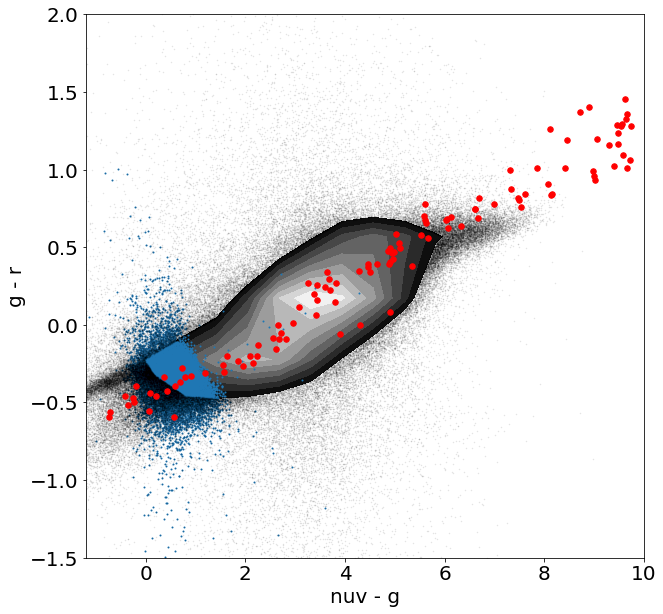

In [20]:
ebvcut = np.where(psg['ebv']> 0)
scatter_contour(((psg['nuv']-psg['ebv']*7.24)-(psg['gMeanPSFMag']-psg['ebv']*3.172))[ebvcut], ((psg['gMeanPSFMag']-psg['ebv']*3.172)-(psg['rMeanPSFMag']-psg['ebv']*2.271))[ebvcut], threshold=10000, log_counts=True, histogram2d_args=dict(bins=40), plot_args=dict(color='k', markersize=1, alpha=0.1), contour_args=dict(cmap=cm.gray))
plt.scatter((ob['nuv']-ob['ebv']*7.24)-(ob['gMeanPSFMag']-ob['ebv']*3.172), (ob['gMeanPSFMag']-ob['ebv']*3.172)-(ob['rMeanPSFMag']-ob['ebv']*2.271), s=1)
plt.scatter(pickles['nuv']-pickles['g'], pickles['g']-pickles['r'], color='red', label='SED model',  s=30, zorder=20)
plt.xlim((-1.2, 10))
plt.ylim((-1.5, 2))
plt.xlabel('nuv - g')
plt.ylabel('g - r')
plt.show()

In [65]:
#scatter_contour(((psg['nuv']-psg['ebv']*7.24)-(psg['gMeanPSFMag']-psg['ebv']*3.172))[ebvcut], ((psg['gMeanPSFMag']-psg['ebv']*3.172)-(psg['rMeanPSFMag']-psg['ebv']*2.271))[ebvcut], threshold=10000, log_counts=True, histogram2d_args=dict(bins=40), plot_args=dict(color='k', markersize=1, alpha=0.1), contour_args=dict(cmap=cm.gray))
from matplotlib.colors import LogNorm
nuvgmag = ((psg['nuv']-psg['ebv']*7.24)-(psg['gMeanPSFMag']-psg['ebv']*3.172))[ebvcut]
gr = ((psg['gMeanPSFMag']-psg['ebv']*3.172)-(psg['rMeanPSFMag']-psg['ebv']*2.271))[ebvcut]

pickles2 = pickles[np.arange(0, len(pickles), 5)]



fig, axes = plt.subplots(2, 2, sharex=True, sharey=True,figsize=(16, 12), facecolor='w')

cmap = axes[0, 0].hist2d(psg['nuv']-psg['gMeanPSFMag'], psg['gMeanPSFMag']-psg['rMeanPSFMag'], bins=5000,cmap='viridis', norm=LogNorm())
axes[0, 0].scatter(pickles2['nuv']-pickles2['g'], pickles2['g']-pickles2['r'], color='red', label='SED model',  s=30, zorder=20)

axes[0, 1].hist2d(psg['nuv']-psg['gMeanPSFMag'], psg['gMeanPSFMag']-psg['rMeanPSFMag'], bins=5000,cmap='viridis', norm=LogNorm())
axes[0, 1].scatter(wds['nuv']-wds['gMeanPSFMag'], wds['gMeanPSFMag']-wds['rMeanPSFMag'],s=1, label='WDs')

axes[1, 0].hist2d(psg['nuv']-psg['gMeanPSFMag'], psg['gMeanPSFMag']-psg['rMeanPSFMag'], bins=5000,cmap='viridis', norm=LogNorm())
axes[1, 0].scatter(ob['nuv']-ob['gMeanPSFMag'], ob['gMeanPSFMag']-ob['rMeanPSFMag'], s=1, label='Selected blue objects')

axes[1, 1].hist2d(nuvgmag, gr, bins=5000,cmap='viridis', norm=LogNorm())
axes[1, 1].scatter((ob['nuv']-ob['ebv']*7.24)-(ob['gMeanPSFMag']-ob['ebv']*3.172), (ob['gMeanPSFMag']-ob['ebv']*3.172)-(ob['rMeanPSFMag']-ob['ebv']*2.271), s=1)


axes[0, 0].arrow(3,  -0.75,  2.972-1.1838,  1.1838-0.8664,  head_length=0.05,  head_width=0.02,  color='red')
axes[0, 1].arrow(3,  -0.75,  2.972-1.1838,  1.1838-0.8664,  head_length=0.05,  head_width=0.02,  color='red')
axes[1, 0].arrow(3,  -0.75,  2.972-1.1838,  1.1838-0.8664,  head_length=0.05,  head_width=0.02,  color='red')
axes[1, 1].arrow(3,  -0.75,  2.972-1.1838,  1.1838-0.8664,  head_length=0.05,  head_width=0.02,  color='red')
axes[0, 0].annotate('O', xy=(0, -0.9), size=20)
axes[0, 0].annotate('B', xy=(1, -0.81), size=20)
axes[0, 0].annotate('A', xy=(2.5, -0.5), size=20)
axes[0, 0].annotate('F', xy=(3.7, -0.5), size=20)
axes[0, 0].annotate('G', xy=(5, -0.3), size=20)
axes[0, 0].annotate('K', xy=(6.2, -0.1), size=20)

axes[0, 0].legend(scatterpoints=1)
axes[0, 1].legend(scatterpoints=1)
axes[1, 0].legend(scatterpoints=1)

fig.subplots_adjust(wspace=0, hspace=0)
axes[0, 0].set_xlim((-1.2, 8))
axes[0, 0].set_ylim((-1.5, 2))
axes[1, 0].set_xlim((-1.2, 8))
axes[1, 0].set_ylim((-1.5, 2))
axes[1, 1].set_xlim((-1.2, 8))
axes[1, 1].set_ylim((-1.5, 2))
axes[1, 0].set_xlabel('NUV - g')
axes[1, 1].set_xlabel('NUV - g')
axes[0, 0].set_ylabel('g - r')
axes[1, 0].set_ylabel('g - r')


cbar_ax = fig.add_axes([0.91, 0.1, 0.03, 0.8])
plt.colorbar(cmap, cax=cbar_ax).set_label('log Age')


plt.show()

AttributeError: 'tuple' object has no attribute 'autoscale_None'

In [61]:
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])